In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("AI_tools_cleaned_dataset.csv")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z ]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_desc"] = df["Short Description"].apply(clean_text)

df[["Short Description","clean_desc"]].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Short Description,clean_desc
0,ChatGPT is an advanced AI language model by Op...,chatgpt advanced ai language model openai gene...
1,Automated assistant handles tasks and talks na...,automated assistant handle task talk naturally
2,Google Gemini is Google DeepMind’s next-genera...,google gemini google deepminds nextgeneration ...
3,Microsoft Copilot is an AI-powered assistant i...,microsoft copilot aipowered assistant integrat...
4,LLaMA is Meta’s family of large language model...,llama metas family large language model design...


In [2]:
from collections import Counter

all_words = " ".join(df["clean_desc"])
word_freq = Counter(all_words.split())

pd.DataFrame(word_freq.most_common(20), columns=["Word","Frequency"])

,Word,Frequency
0,ai,6220
1,aipowered,2713
2,tool,1802
3,content,1706
4,platform,1567
5,create,1329
6,help,1310
7,video,1309
8,image,1145
9,user,1086


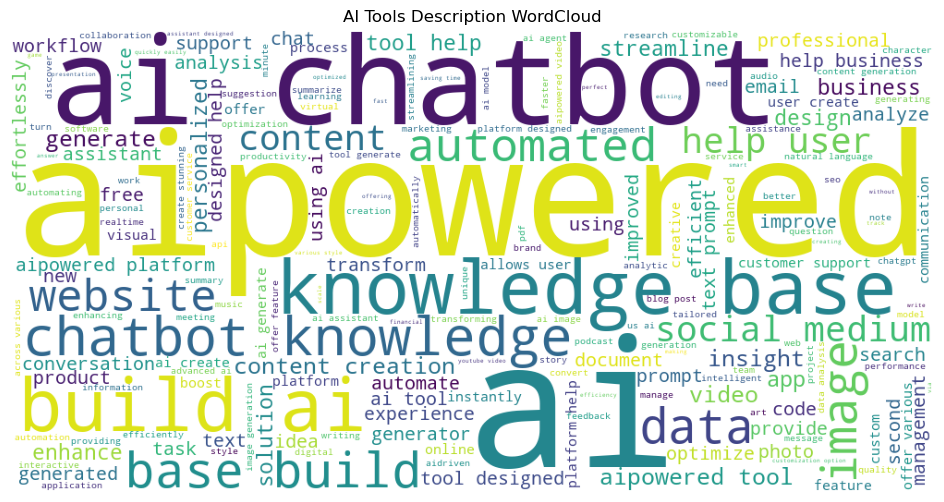

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=1000, height=500, background_color="white").generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("AI Tools Description WordCloud")
plt.show()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=15)
X = vectorizer.fit_transform(df["clean_desc"])

keywords = vectorizer.get_feature_names_out()
keywords

array(['ai', 'aipowered', 'business', 'chatbot', 'content', 'create',
       'help', 'image', 'personalized', 'platform', 'text', 'tool',
       'user', 'various', 'video'], dtype=object)

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = cv.fit_transform(df["clean_desc"])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx+1}:")
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['generator', 'product', 'free', 'transform', 'second', 'photo', 'generate', 'create', 'image', 'ai']

Topic 2:
['productivity', 'team', 'insight', 'management', 'tool', 'task', 'assistant', 'data', 'aipowered', 'ai']

Topic 3:
['image', 'user', 'create', 'various', 'content', 'aipowered', 'tool', 'text', 'ai', 'video']

Topic 4:
['marketing', 'writing', 'business', 'sale', 'platform', 'ai', 'customer', 'help', 'aipowered', 'content']

Topic 5:
['experience', 'learning', 'aipowered', 'platform', 'base', 'personalized', 'knowledge', 'build', 'chatbot', 'ai']


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["clean_desc"])

def recommend_tools(user_query, top_n=5):
    user_vec = vectorizer.transform([user_query])
    similarity = cosine_similarity(user_vec, tfidf_matrix)
    top_indices = similarity[0].argsort()[-top_n:][::-1]
    return df.iloc[top_indices][["Name","Category","Primary Task","Website"]]

recommend_tools("AI tool for generating images")

,Name,Category,Primary Task,Website
7467,Writeasily,Media And Content Creation,Content,https://writeasily.com?ref=aitoolbuzz.com
9452,Bogar,Media And Content Creation,Writing,https://www.bogar.ai?ref=aitoolbuzz.com
7869,Headshotpro,Creative And Entertainment,Professional avatars,https://www.headshotpro.com?ref=aitoolbuzz.com
8149,EzMail,Ai And Machine Learning,Gmail email writing,https://www.ezmail.ai?ref=aitoolbuzz.com
10599,Make-A-Video,Media And Content Creation,Videos,https://makeavideo.studio?ref=aitoolbuzz.com
